# Implementation from Scratch

<br />

I am going to create a 3 layers of neural network for multi-class classification.

In [17]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

### Prepare MNIST Dataset

In [1]:
# Download the MNIST dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
# Check the dataset

print(X_train.shape)   # (60000, 28, 28)
print(X_test.shape)   # (10000, 28, 28)
print(X_train[0].dtype)   # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

# Flatten

<br />

I will transform (1, 28, 28) of each image to (1, 784).

In [3]:
# Flatten

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

### Visualize the Image Data

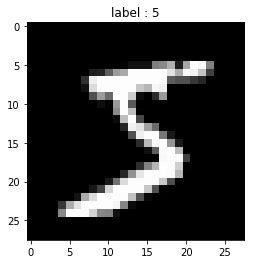

In [5]:
# Plot

index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)

plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

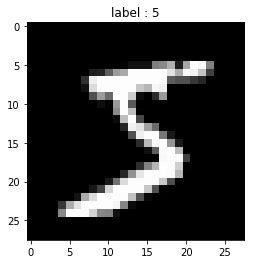

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [9]:
# Plot

index = 0
image = X_train[index].reshape(28,28)
# Change it to float
image = image.astype(np.float)
# Create minus fractional value intentionally
image -= 105.35

plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

# Check the values
print(image)

### Preprocessing

In [10]:
# Transform unit8 to float

X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

print(X_train.max())   # 1.0
print(X_train.min())   # 0.0

1.0
0.0


In [12]:
# Transform correct labels that are 0 to 9 to 

# Initialize
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])

# Transform
y_test_one_hot = enc.transform(y_test[:, np.newaxis])

print(y_train.shape)   # (60000,)
print(y_train_one_hot.shape)   # (60000, 10)
print(y_train_one_hot.dtype)   # float64

(60000,)
(60000, 10)
float64


In [14]:
# Split the train dataset

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

print(X_train.shape)   # (48000, 784)
print(X_val.shape)   # (12000, 784)

(48000, 784)
(12000, 784)


## [Task 1] Create a Class of Neural Network Classifier

### Mini-batch Processing

In [15]:
# Create a class to get a mini-batch

class GetMiniBatch():
    """
    Iterator to get a mini-batch

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
      Train dataset
    
    y : ndarray, shape (n_samples, 1)
      Correct values
    
    batch_size : int
      Size of batch
    
    seed : int
      Seed of random numbers of Numpy
    """
    
    def __init__(self, X, y, batch_size = 10, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self.X = X[shuffle_index]
        self.y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    
    
    def __len__(self):
        return self._stop
    
    
    def __getitem__(self, item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        
        return self.X[p0:p1], self.y[p0:p1]        
    
    
    def __iter__(self):
        self._counter = 0
        
        return self
    
    
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        
        return self.X[p0:p1], self.y[p0:p1]

### Forwardpropagation

<br />

I am going to create a forwardpropagation method of 3 layers of neural network.

In [26]:
# Create a class of a forwardpropagation method of 3 layers of neural network

class Forwardpropagation():
    """
    Forwardpropagation method
    
    Attributes
    ----------
    self.sum_A : int
        Sum of outputs
    """
    
    def weight_bias(self, n_features, n_nodes, sigma=0.01):
        """
        Get a weight and a bias.
        """
        
        W = sigma * np.random.randn(n_features, n_nodes)
        B = sigma * np.random.randn(n_nodes,1)
        
        return W, B
    
    
    def layer_processing(self, X, W, B):
        """
        Processing of a layer

        Parameters
        ----------
        X : ndarray, shape (batch_size, n_features)
            Feature vector

        W : ndarray, shape (n_features, ith n_nodes)
            Weight of ith layer

        B : ndarray, shape (ith n_nodes,)
            Bias of ith layer
        
        
        Returns
        -------
        A : ndarray, shape (batch_size, ith n_nodes)
            Output
        """
        
        # Processing of a layer
        A = np.dot(X, W) + B
        
        # Sum outputs
        self.sum_A += A
        
        return A
    
    
    def activation_func(self, A, act_func):
        """
        Activation function
        
        Parameters
        ----------
        A : ndarray, shape (batch_size, ith n_nodes)
            Output
        
        
        Returns
        -------
        ndarray, shape (batch_size, ith n_nodes)
            Output
        """
        
        # Sigmoid function
        if act_func == sigmoid:
            return 1 / (1+np.exp(-A))
        # tanh
        if act_func == tanh:
            return np.tanh(A)
    
    
    def softmax_func(self, A):
        """
        Softmax function
        
        Parameters
        ----------
        A : ndarray, shape (batch_size,)
            Vector from previous layer of kth class
        
        
        Returns
        -------
        ndarray, shape (batch_size,)
            Probability vector of kth class
        """
        
        return np.exp(A) / self.sum_A
    
    
    # Objective function
    def cross_entropy_loss(self, y, Z):
        """
        Cross entropy loss
        
        Parameters
        ----------
        Z : ndarray, shape (batch_size,)
            Probability vector of kth class
        
        
        Returns
        -------
        float
            Cross entropy loss
        """
        
        return -np.dot(y, Z)

### Backpropagation

<br />

I am going to create a backpropagation method of 3layers of neural network.

In [ ]:
# Create a class of a backpropagation method of 3 layers of neural network

class Backpropagation():
    """
    Backpropagation method
    
    Attributes
    ----------
    self.sum_A : int
        Sum of outputs
    """
    
    def weight_bias(self, n_features, n_nodes, sigma=0.01):
        """
        Get a weight and a bias.
        """
        
        W = sigma * np.random.randn(n_features, n_nodes)
        B = sigma * np.random.randn(n_nodes,1)
        
        return W, B
    
    
    def layer_processing(self, X, W, B):
        """
        Processing of a layer

        Parameters
        ----------
        X : ndarray, shape (batch_size, n_features)
            Feature vector

        W : ndarray, shape (n_features, ith n_nodes)
            Weight of ith layer

        B : ndarray, shape (ith n_nodes,)
            Bias of ith layer
        
        
        Returns
        -------
        A : ndarray, shape (batch_size, ith n_nodes)
            Output
        """
        
        # Processing of a layer
        A = np.dot(X, W) + B
        
        # Sum outputs
        self.sum_A += A
        
        return A
    
    
    def activation_func(self, A, act_func):
        """
        Activation function
        
        Parameters
        ----------
        A : ndarray, shape (batch_size, ith n_nodes)
            Output
        
        
        Returns
        -------
        ndarray, shape (batch_size, ith n_nodes)
            Output
        """
        
        # Sigmoid function
        if act_func == sigmoid:
            return 1 / (1+np.exp(-A))
        # tanh
        if act_func == tanh:
            return np.tanh(A)
    
    
    def softmax_func(self, A):
        """
        Softmax function
        
        Parameters
        ----------
        A : ndarray, shape (batch_size,)
            Vector from previous layer of kth class
        
        
        Returns
        -------
        ndarray, shape (batch_size,)
            Probability vector of kth class
        """
        
        return np.exp(A) / self.sum_A
    
    
    # Objective function
    def cross_entropy_loss(self, y, Z):
        """
        Cross entropy loss
        
        Parameters
        ----------
        Z : ndarray, shape (batch_size,)
            Probability vector of kth class
        
        
        Returns
        -------
        float
            Cross entropy loss
        """
        
        return -np.dot(y, Z)

In [24]:
# Create a class of neural network classifier

class ScratchSimpleNeuralNetrowkClassifier():
    """
    Implement simple 3 layers of neural network classifier.
    
    Parameters
    ----------
    verbose : bool
        True if output the learning process
    
    num_epoch : int
        The number of epochs
    
    Attributes
    ----------
    self.loss : ndarray, shape (self.iter,)
        Records of loss on train dataset
    """
    
    def __init__(self, num_epoch, verbose=True):
        # Record hyperparameters as attribute
        self.epoch = num_epoch
        self.verbose = verbose
        
        # Prepare arrays for recording loss
        self.loss = np.zeros(self.iter)
    
    
    def fit(self, X, y, X_val=None, y_val=None, act_func="tanh"):
        """
        Fit neural network classifier.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of train dataset
        
        y : ndarray, shape (n_samples, )
            Correct values of train dataset
        
        X_val : ndarray, shape (n_samples, n_features)
            Features of validation dataset
        
        y_val : ndarray, shape (n_samples, )
            Correct values of validation dataset
        """
        
        # Output learning process and so on if verbose is True
        if self.verbose:
            print(self.loss)
        
        # Initialize
        get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=10)
        
        # Check the class
#         print(len(get_mini_batch))   # 4800
#         print(get_mini_batch[5])   # Get a 5th mini-batch
        
        # Initialize
        fp = Forwardpropagation()
        
        n_features = 784
        n_nodes1 = 400
        # Standard deviation of Gaussian distribution
        sigma = 0.01
        
        # Get an initial values
        W, B = fp.weight_bias(n_features, n_nodes1, sigma)
        
        # Loop of mini-batch
        for i in range(self.epoch):
            for mini_X_train, mini_y_train in get_mini_batch:
                # Forwardpropagation
                # 1st layer
                # Processing of the layer
                A = fp.layer_processing(X, W, B)
                # Activation function
                X = fp.activation_func(A, act_func)
                
                # 2nd layer
                # Number of nodes of 2nd layer
                n_nodes2 = 200
                # Get a weight and a bias
                W, B = fp.weight_bias(n_features, n_nodes2, sigma)
                # Processing of the layer
                A = fp.layer_processing(X, W, B)
                # Activation function
                X = fp.activation_func(A, act_func)
                
                # 3rd layer (Softmax)
                # Number of classes of output (Number of nodes of 3rd layer)
                n_output = 10
                # Get a weight and a bias
                W, B = fp.weight_bias(n_features, n_output, sigma)
                # Processing of the layer
                A = fp.layer_processing(X, W, B)
                # Activation function
                X = fp.softmax_func(A)
                
                # 4th layer (Cross entropy loss)
                L = fp.cross_entropy_loss(y, X)
                
                # Backpropagation
                pass
    
    
    def predict(self, X):
        """
        Predict by neural network classifier.
        
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Samples
        
        
        Returns
        -------
        ndarray, shape (n_samples, 1)
            Results of prediction
        """
        
        pass
        return